<img style="float: left;" width="120" src="../images/kaggle.png">
<br><br><br>
<h2><center>House Prices: Advanced Regression Techniques</center></h2>


<h2><center> Exploratory Data Analysis</center></h2>

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import norm

%matplotlib inline

In [5]:
df_train = pd.read_csv('../data/train.csv', index_col='Id', parse_dates=True).sort_index()
df_test = pd.read_csv('../data/test.csv', index_col='Id', parse_dates=True).sort_index()

#Append
df_train_indepenent = df_train.drop(["SalePrice"], axis=1)
df_data = pd.concat([df_train_indepenent, df_test], ignore_index=True)

df_train.shape,df_test.shape,df_data.shape

((1460, 80), (1459, 79), (2919, 79))

## Plot Styles

In [4]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [4]:
file_train = open("../data/train_pickle","rb")
df_train = pickle.load(file_train)

file_data = open("../data/train_pickle","rb")
df_data = pickle.load(file_data)

#df_train.info()
df_train.shape

(1460, 81)

## Palette

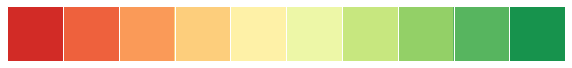

In [5]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'

plt.style.use('seaborn')
sns.set_style('darkgrid')
color = sns.color_palette()

plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14

plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'

sns.set_palette(sns.color_palette("RdYlGn"))

plt.rcParams
sns.palplot(sns.color_palette("RdYlGn", 10))

## 4 Colours

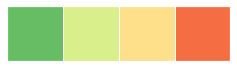

In [16]:
import seaborn as sns; #sns.set()
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from matplotlib.colors import ListedColormap

pal4 = sns.color_palette("RdYlGn",4)
pal4_r = sns.color_palette("RdYlGn_r",4)

sns.set_palette(sns.color_palette(pal4.reverse()))
#Reverse
cmap4 = ListedColormap(sns.color_palette(pal4).as_hex())
cmap4_r = ListedColormap(sns.color_palette(pal4_r).as_hex())

sns.palplot(pal4)

## Target Feature Boxplot

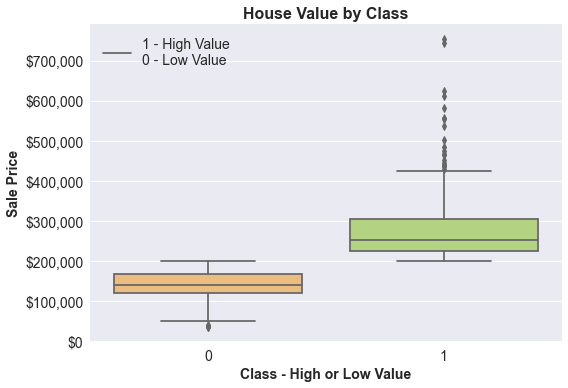

In [145]:
ax = sns.boxplot(x=df_train["HighValue"],y=df_train["SalePrice"], palette="RdYlGn");

fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

ax.set_title('House Value by Class')
ax.set_ylabel('Sale Price')
ax.set_xlabel('Class - High or Low Value')
plt.legend(['1 - High Value\n0 - Low Value'],loc='upper left')


plt.tight_layout()
plt.show()

figure = ax.get_figure()    
figure.savefig('../doc/figures/target_boxplot.png', dpi=600)


## Target Feature Imbalance

In [80]:
def without_hue(plot, feature):
    total = len(feature)
    for p in bx.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        bx.annotate(percentage, (x, y), size = 14)
    plt.show()

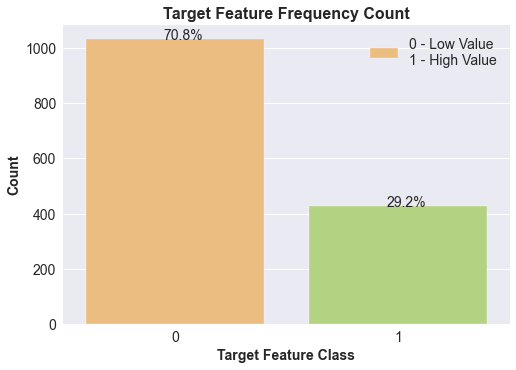

<Figure size 576x396 with 0 Axes>

[8.0, 5.5]

In [143]:
bx = sns.countplot("HighValue", data=df_train,  palette="RdYlGn")

bx.set_title('Target Feature Frequency Count')
plt.legend(['0 - Low Value\n1 - High Value'],loc='best')
plt.xlabel('Target Feature Class')
plt.ylabel('Count')

without_hue(bx, df_train.HighValue)

plt.tight_layout()
plt.show()
figure = bx.get_figure()    
figure.savefig('../doc/figures/target_feature_frequency.png', dpi=600)
plt.rcParams['figure.figsize']

## Sale Price Distribution

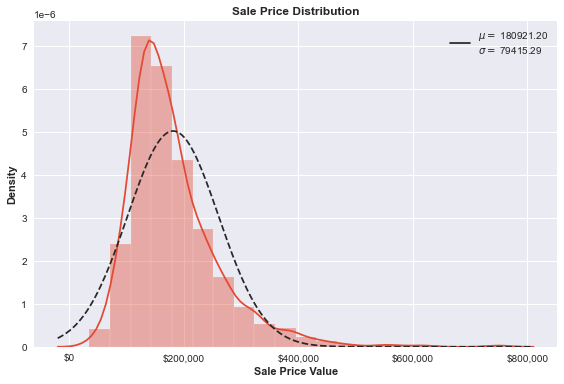

In [549]:
plt.style.use('seaborn')
sns.set_style('darkgrid')
sns.set_palette(sns.color_palette("RdYlGn"))

(mu, sigma) = norm.fit(df_train['SalePrice'])
(mu, sigma) 
#Mean price is 180921.19 and std dev is 79415.29

ax = sns.distplot(df_train.SalePrice, kde=True, fit=norm, bins=20); #rug=True
fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

ax.set_title('Sale Price Distribution')
ax.set_ylabel('Density')
ax.set_xlabel('Sale Price Value')
plt.legend(['$\mu=$ {:.2f}\n$\sigma=$ {:.2f}'.format(mu, sigma)],loc='best')

ax.lines[1].set_linestyle("--") 

plt.tight_layout()
plt.show()
figure = ax.get_figure()    

figure.savefig('../doc/figures/sale_price_distribution.png', dpi=600)

## Target Feature Correlation

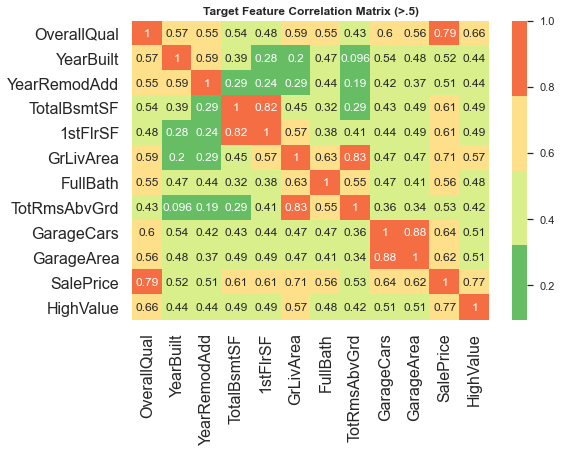

<Figure size 576x576 with 0 Axes>

In [11]:
df_corr = df_train.corr()
corr_features = df_corr.index[abs(df_corr["SalePrice"]) > 0.5]

ax = sns.heatmap(df_train[corr_features].corr(),annot=True,cmap=pal4)
ax.tick_params(labelsize=16)
ax.set_title('Target Feature Correlation Matrix (>.5)')

plt.figure(figsize=(8,8))
plt.tight_layout()
plt.show()

figure = ax.get_figure()    
figure.savefig('../doc/figures/target_feature_correlation.png', dpi=600)

In [31]:
c = df_data.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort",ascending=False)
soc = so[(so < 1) & (so >= 0.65)]
soc


GarageArea    GarageCars      0.889700
GarageCars    GarageArea      0.889700
YearBuilt     GarageYrBlt     0.834812
GarageYrBlt   YearBuilt       0.834812
GrLivArea     TotRmsAbvGrd    0.808354
TotRmsAbvGrd  GrLivArea       0.808354
TotalBsmtSF   1stFlrSF        0.801670
1stFlrSF      TotalBsmtSF     0.801670
TotRmsAbvGrd  BedroomAbvGr    0.669737
BedroomAbvGr  TotRmsAbvGrd    0.669737
GrLivArea     2ndFlrSF        0.655085
2ndFlrSF      GrLivArea       0.655085
GarageYrBlt   YearRemodAdd    0.652365
YearRemodAdd  GarageYrBlt     0.652365
dtype: float64

In [32]:
fc = soc.to_frame().reset_index()
fc.rename(columns={ fc.columns[0]: "Feature1" }, inplace = True)
fc.rename(columns={ fc.columns[1]: "Feature2" }, inplace = True)
fc.rename(columns={ fc.columns[2]: "Correlation" }, inplace = True)
features_highly_correlated = fc.iloc[::2][(fc.Feature1 != 'SalePrice') & (fc.Feature2 != 'SalePrice') & (fc.Feature2 != 'HighValue')]
features_highly_correlated = features_highly_correlated[features_highly_correlated['Correlation'] >= 0.6]
features_highly_correlated.rename(columns={ features_highly_correlated.columns[0]: "Feature 1" }, inplace = True)
features_highly_correlated.rename(columns={ features_highly_correlated.columns[1]: "Feature 2" }, inplace = True)
features_highly_correlated
fhc = features_highly_correlated

C:\Users\pawel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


In [33]:
# Set CSS properties for th elements in dataframe
th_props = [
  ('font-size', '14px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
  ('color', '#6d6d6d'),
  ('background-color', '#f7f7f9')
  ]

# Set CSS properties for td elements in dataframe
td_props = [
  ('font-size', '12px'),
  ]

# Set table styles
styles = [
  dict(selector="th", props=th_props),
  dict(selector="td", props=td_props)
  ]

fhc2 = (fhc.style
     .background_gradient(cmap=cmap4)
        .format({'my_columns': "{:.2%}"})
    .set_table_styles(styles))
#     .background_gradient(cmap="Reds")

import dataframe_image as dfi
dfi.export(fhc2, '../doc/figures/independent_features_correlated.png')

fhc2

,Feature 1,Feature 2,Correlation
0,GarageArea,GarageCars,0.889700
2,YearBuilt,GarageYrBlt,0.834812
4,GrLivArea,TotRmsAbvGrd,0.808354
6,TotalBsmtSF,1stFlrSF,0.801670
8,TotRmsAbvGrd,BedroomAbvGr,0.669737
10,GrLivArea,2ndFlrSF,0.655085
12,GarageYrBlt,YearRemodAdd,0.652365


## Missing Value Ratio

In [35]:
s_mvr = df_data.isnull().sum()/len(df_data)*100
df_mvr = pd.DataFrame(s_mvr)
df_mvr.rename(columns={0:'Missing Value Ratio'},inplace=True)
s_mvr.to_excel("feature_missing_ratio.xlsx")

#Display mvr > threshold 5
df_mvrs = df_mvr.sort_values(kind="quicksort",by="Missing Value Ratio", ascending=False)
df_mvrs[df_mvrs['Missing Value Ratio'] > 5]

,Missing Value Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageYrBlt,5.447071
GarageFinish,5.447071
GarageQual,5.447071
GarageCond,5.447071


In [49]:
df_mvrs2 = (df_mvrs.style
     .background_gradient(cmap=cmap4)
        .format({'Missing Value Ratio': "{:.2%}"})
    .set_table_styles(styles))

df_mvrs2

,Missing Value Ratio
PoolQC,9965.74%
MiscFeature,9640.29%
Alley,9321.69%
Fence,8043.85%
FireplaceQu,4864.68%
LotFrontage,1664.95%
GarageYrBlt,544.71%
GarageFinish,544.71%
GarageQual,544.71%
GarageCond,544.71%


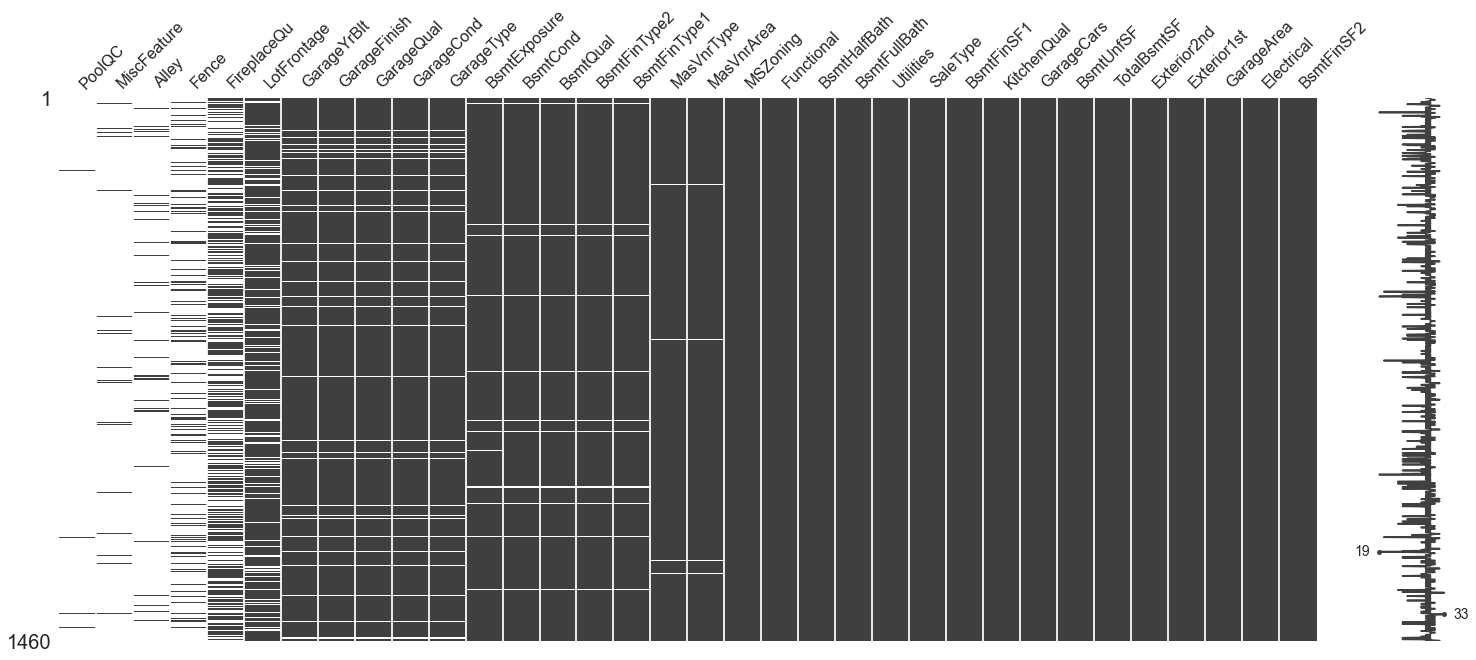

In [582]:
import missingno as msno 
m = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu','LotFrontage', 'GarageYrBlt', 'GarageFinish', 'GarageQual','GarageCond', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual',       'BsmtFinType2', 'BsmtFinType1', 'MasVnrType', 'MasVnrArea','MSZoning', 'Functional', 'BsmtHalfBath', 'BsmtFullBath', 'Utilities', 'SaleType', 'BsmtFinSF1', 'KitchenQual', 'GarageCars','BsmtUnfSF', 'TotalBsmtSF', 'Exterior2nd', 'Exterior1st','GarageArea', 'Electrical', 'BsmtFinSF2']
    
ax = msno.matrix(pd.DataFrame(df_data[m]))
figure = ax.get_figure()
figure.savefig('../doc/figures/missing.png', dpi=600)


## Low Variance Filter

In [7]:
df_data_variance = pd.DataFrame(df_data.var()).reset_index()

df_data_variance.rename(columns={'index':'Feature'},inplace=True)
df_data_variance.rename(columns={0:'Variance'},inplace=True)

df_data_variance.sort_values(by=['Variance'], ascending=True, inplace=True)

In [310]:
import seaborn as sns

cm = sns.light_palette("green", as_cmap=True)

s = fhc.style.background_gradient(cmap=cm)\
    .set_table_styles([{'selector': 'Correlation', 'Feature 2': [('font-size', '4pt')]}])\
    .set_properties(**{ 'font-size': '14pt'})

s

,Feature 1,Feature 2,Correlation
0,GarageArea,GarageCars,0.882475
2,YearBuilt,GarageYrBlt,0.825667
4,GrLivArea,TotRmsAbvGrd,0.825489
6,1stFlrSF,TotalBsmtSF,0.819530
14,GrLivArea,2ndFlrSF,0.687501
16,BedroomAbvGr,TotRmsAbvGrd,0.676620
20,BsmtFinSF1,BsmtFullBath,0.649212
22,GarageYrBlt,YearRemodAdd,0.642277
26,GrLivArea,FullBath,0.630012
30,2ndFlrSF,TotRmsAbvGrd,0.616423


In [ ]:
corrmat = df_train.corr()
corr_features = corrmat.index[abs(corrmat["SalePrice"]) > 0.5]

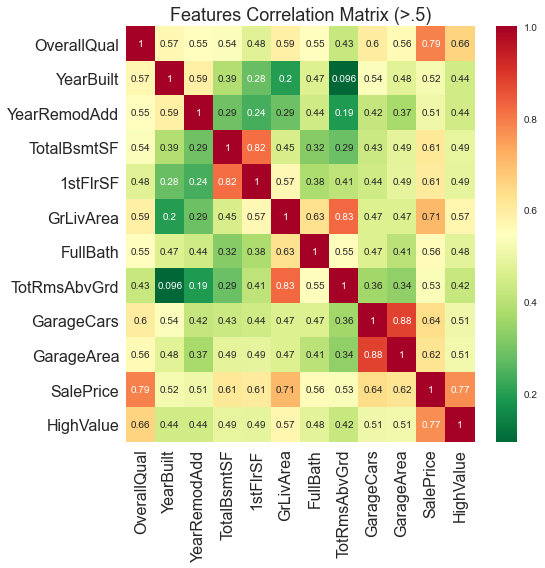

In [31]:
corrmat = df_train.corr()
corr_features = corrmat.index[abs(corrmat["SalePrice"]) > 0.5]
plt.figure(figsize=(8,8))
ax = sns.heatmap(df_train[corr_features].corr(),annot=True,cmap="RdYlGn_r")
ax.tick_params(labelsize=16)
ax.set_title('Features Correlation Matrix (>.5)', size = 18)
plt.tight_layout()

plt.show()

figure = ax.get_figure()    
figure.savefig('../doc/figures/correlation_RdYlGn_r.png', dpi=600)

In [67]:
df_train.groupby('HighValue')['SalePrice'].describe().transpose()

HighValue,0,1
count,1033.000000,427.000000
mean,141516.842207,276248.355972
std,33138.866000,77978.862864
min,34900.000000,200100.000000
25%,119500.000000,224900.000000
50%,141000.000000,252678.000000
75%,168500.000000,306500.000000
max,200000.000000,755000.000000


<div style="text-align: right">Preapred by Pawel Sobieralski, 2020 </div>